In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import os
import glob

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 20

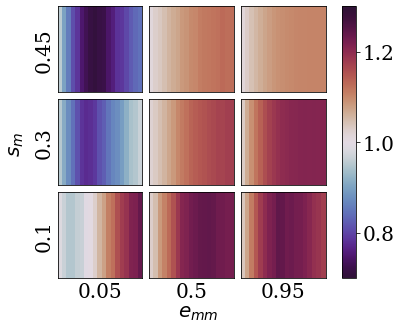

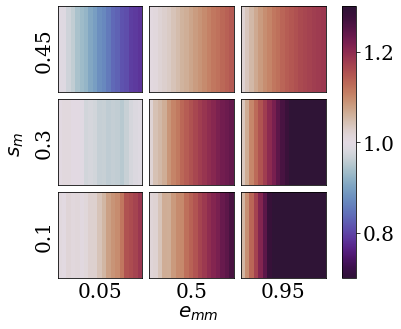

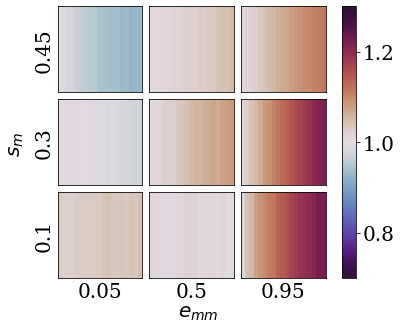

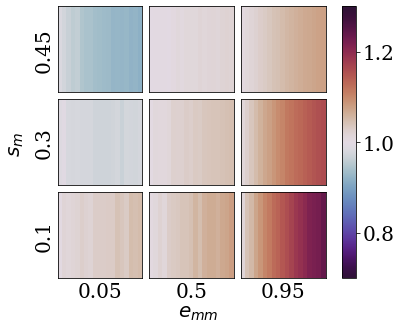

In [29]:
vec_e_mm = [0.05, 0.5, 0.95]

#vec_s_m = [0.1, 0.3, 0.45]

vec_s_m = [0.45, 0.3, 0.1]

vec_method = ["als", "salsa", "ada", "random"]

lst_heatmap1 = sorted(glob.glob("../tsv_synth/tsv_majority_neutral/*"))

for method in vec_method:
    
    fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (6, 5))

    plt.subplots_adjust(wspace = 0.08, hspace =  0.08)



    for i, sm in enumerate(vec_s_m):

        for j, e_mm in enumerate(vec_e_mm):

            hm = round(e_mm - sm, 2)

            config = "s_m" + str(sm) + "-hm" + str(hm)

            #print(config)

            file_dir = [x for x in lst_heatmap1 if config in x][0]

            df_visibility = pd.read_csv(file_dir, 
                                        sep = "\t", header = None, index_col = 0)


            method_index = list(filter(lambda x: "_%s"%method in x, df_visibility.index))[0]

            one_vec = 1+df_visibility.loc[method_index].pct_change().cumsum().dropna()

            ax[i,j].set(adjustable='box')

            im = ax[i,j].pcolormesh([one_vec], cmap="twilight_shifted", 
                                    vmin=0.7, 
                                    vmax=1.3,
                                   )

            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([])

            if i == 2:

                ax[i,j].set_xlabel(e_mm)

            if j == 0:

                ax[i,j].set_ylabel(sm)
                
                


    fig.colorbar(im, ax=ax.ravel().tolist())

    
    fig.text(0.45, 0.03, '$e_{mm}$', ha='center', va='center')
    fig.text(0.03, 0.5, '$s_{m}$', ha='center', va='center', rotation="vertical")
    
    
    plt.savefig("heatmap-%s.pdf"%method, format="pdf")